In [1]:
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
dataset_path = 'cmake-build-debug/real_data_curve.csv'
data_curve = np.genfromtxt(dataset_path, delimiter=',', dtype=float, filling_values=np.nan)

In [3]:
data_curve.shape

(4033, 8)

In [4]:
pono = np.copy(data_curve[:,2:8])
pono[:,:3] = (data_curve[:,2:5] - data_curve[0,2:5])*1e3
pono[:,2] *= -1
pono[:,4] = data_curve[:,7]
pono[:,5] = data_curve[:,6]

In [196]:
from scipy.ndimage import uniform_filter

def moving_average_filter(data, size):
    """
    Applies a moving average filter to an ndarray.

    Args:
        data (ndarray): The input ndarray.
        size (int or tuple of ints): The size of the moving average window. 
                                     If an int, the same size is used for all dimensions.
                                     If a tuple, it specifies the size for each dimension.

    Returns:
        ndarray: The filtered ndarray.
    """
    return uniform_filter(data, size=size)

pono_f = np.copy(pono)
pono_f[:,:3] = moving_average_filter(pono[:,:3], (20,1))

In [197]:
pono.shape

(4033, 6)

In [198]:
data_curve[0,2]

4.373584270477

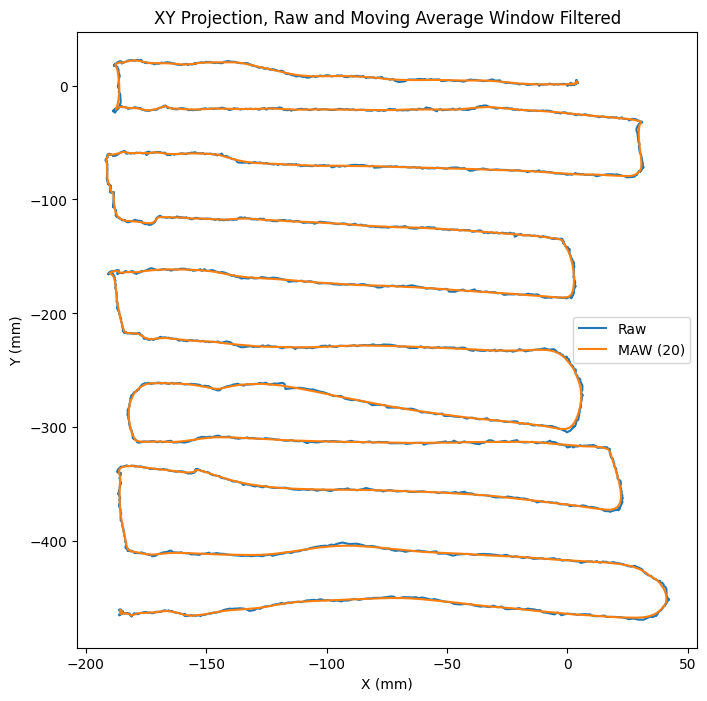

In [207]:
plt.figure(figsize=(8, 8))
plt.plot(pono[:,0], pono[:,1], label='Raw')
plt.plot(pono_f[:,0], pono_f[:,1], label='MAW (20)')
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("XY Projection, Raw and Moving Average Window Filtered")
plt.legend()
# plt.axis('equal') # Ensure equal aspect ratio

In [225]:
avg = []
for i in range(3):
    avg.append(np.std(pono_f[:,i] - pono[:,i]))

print(np.average(avg))

0.5896118937618912


In [217]:
np.average(np.linalg.norm(pono_f[:,:3] - pono[:,:3], axis=1))

0.8865896386555139

In [219]:
np.average(np.linalg.norm(pono_f[:,:3], axis=1))

253.14895121571735

In [212]:
avg

[0.02313268530490068, 0.05767986182094044, -0.0038981230773774554]

In [234]:
np.average(np.diff(data_curve[:,0]))

6.042906746031746

In [246]:
np.diff(pono_f[:,:3], axis=0)

(4032, 3)

In [248]:
np.average(np.linalg.norm(1e-3*np.diff(pono[:,:3], axis=0)/(np.average(np.diff(data_curve[:,0]))*1e-3), axis=1))

0.15740856247315674

Text(0.5, 1.0, 'Motion speed distribution')

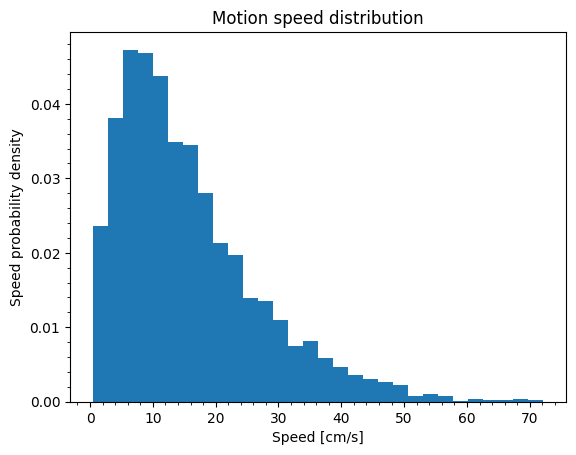

In [254]:
plt.hist(np.linalg.norm(1e-1*np.diff(pono[:,:3], axis=0)/(np.average(np.diff(data_curve[:,0]))*1e-3), axis=1), density=True, bins=30)
plt.minorticks_on()
plt.xlabel('Speed [cm/s]')
plt.ylabel('Speed probability density')
plt.title('Motion speed distribution')

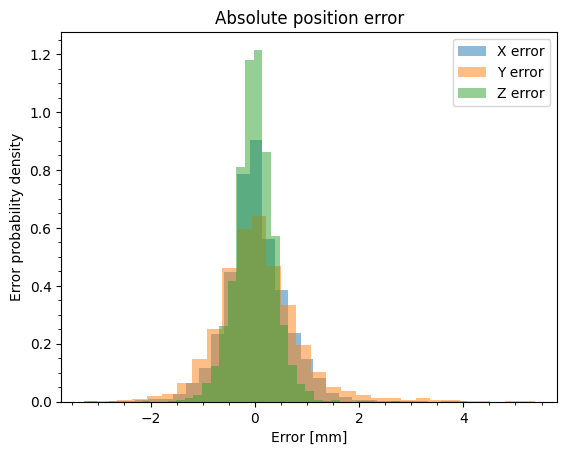

In [255]:
plt.hist(pono_f[:,0] - pono[:,0], bins=30, alpha=0.5, density=True, label='X error')
plt.hist(pono_f[:,1] - pono[:,1], bins=30, alpha=0.5, density=True, label='Y error')
plt.hist(pono_f[:,2] - pono[:,2], bins=30, alpha=0.5, density=True, label='Z error')
plt.minorticks_on()
plt.xlabel('Error [mm]')
plt.ylabel('Error probability density')
plt.title('Absolute position error')
plt.legend()

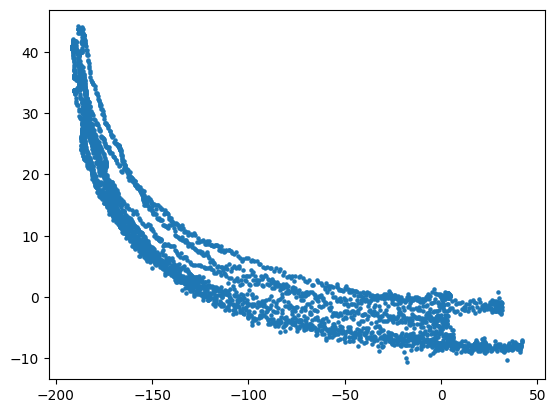

In [200]:
plt.scatter(pono[:,0], pono[:,2], s=5)

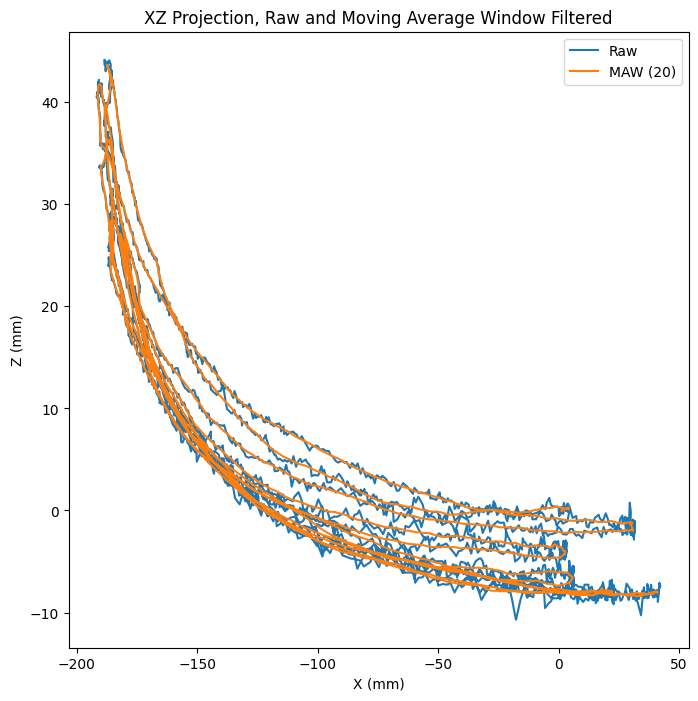

In [206]:
plt.figure(figsize=(8, 8))
plt.plot(pono[:,0], pono[:,2], label='Raw')
plt.plot(pono_f[:,0], pono_f[:,2], label='MAW (20)')
plt.xlabel("X (mm)")
plt.ylabel("Z (mm)")
plt.title("XZ Projection, Raw and Moving Average Window Filtered")
plt.legend()
# plt.axis('equal') # Ensure equal aspect ratio

In [168]:
def plot_point_cloud_with_normals(points_and_normals):
    """
    Generates two plots (XY and XZ projections) of 3D points colored by their surface normals.

    Args:
        points_and_normals (np.ndarray): A (n, 6) numpy array where each row
                                        contains [x, y, z, nx, ny, nz] representing
                                        a 3D point (x, y, z) in mm and its surface normal (nx, ny, nz).
    """

    points = points_and_normals[:, :3]  # Extract x, y, z coordinates
    normals = points_and_normals[:, 3:] # Extract nx, ny, nz normals

    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    nx = normals[:, 0]
    ny = normals[:, 1]
    nz = normals[:, 2]

    # --- Normal to Color Mapping ---
    colors = np.zeros((normals.shape[0], 3)) # Initialize RGB color array

    # Red channel: nx (-1 to +1) maps to Red (0 to 255)
    colors[:, 0] = ((nx + 1) / 2 * 255).astype(int)

    # Green channel: ny (-1 to +1) maps to Green (0 to 255)
    colors[:, 1] = ((ny + 1) / 2 * 255).astype(int)

    # Blue channel: nz (0 to -1) maps to Blue (128 to 255)
    colors[:, 2] = ((nz / -1) * (255 - 128) + 128).astype(int) # Scale and shift for 128-255 range

    # Normalize colors to be in the range [0, 1] for matplotlib
    colors = colors / 255.0

    # --- XY Projection Plot ---
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c=colors, s=20) # Use scatter plot for points, color by calculated colors
    plt.xlabel("X (mm)")
    plt.ylabel("Y (mm)")
    plt.title("XY Projection Colored by Normal")
    plt.axis('equal') # Ensure equal aspect ratio
    plt.savefig("xy_projection_normal_colored.png") # Save the plot
    plt.show()


    # --- XZ Projection Plot ---
    plt.figure(figsize=(8, 8))
    plt.scatter(x, z, c=colors, s=20) # Use scatter plot for points, color by calculated colors
    plt.xlabel("X (mm)")
    plt.ylabel("Z (mm)")
    plt.title("XZ Projection Colored by Normal")
    # plt.axis('equal') # Ensure equal aspect ratio
    plt.savefig("xz_projection_normal_colored.png") # Save the plot
    plt.show()

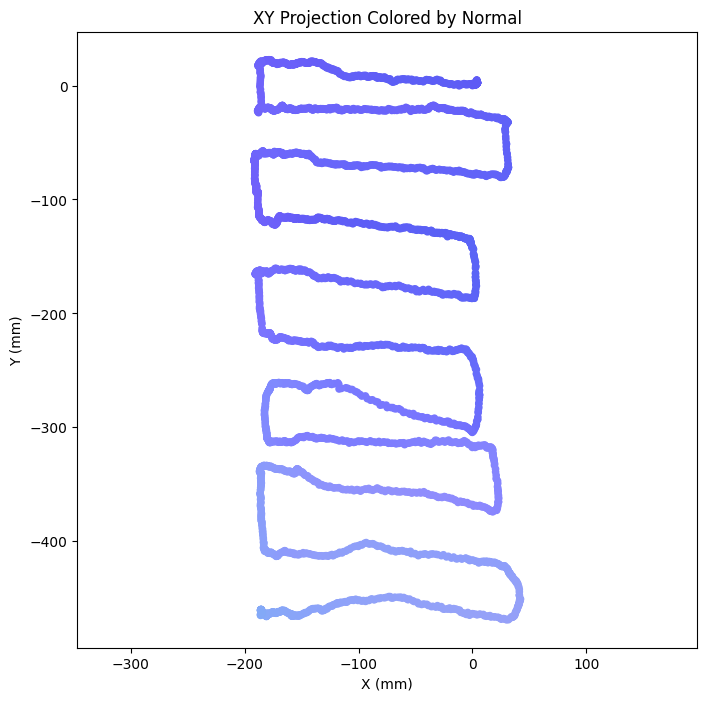

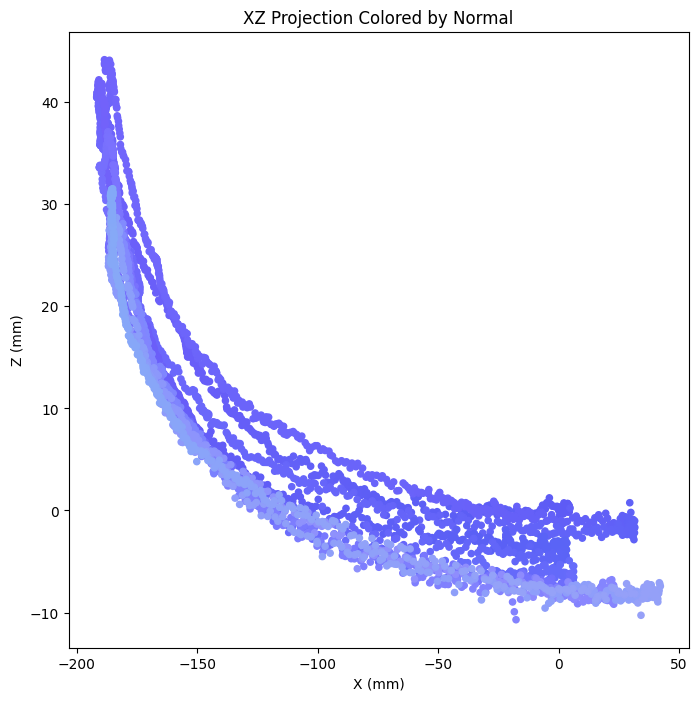

In [169]:
plot_point_cloud_with_normals(pono)

In [170]:
from mpl_toolkits.mplot3d import Axes3D

def normal_to_color(normals):
    """
    Converts surface normals to RGB colors based on the specified mapping.

    Args:
        normals (np.ndarray): A (n, 3) numpy array of surface normals (nx, ny, nz).

    Returns:
        np.ndarray: A (n, 3) numpy array of RGB colors (normalized to [0, 1]).
    """
    colors = np.zeros_like(normals)
    nx = normals[:, 0]
    ny = normals[:, 1]
    nz = normals[:, 2]

    # Red channel: nx (-1 to +1) maps to Red (0 to 255)
    colors[:, 0] = ((nx + 1) / 2)

    # Green channel: ny (-1 to +1) maps to Green (0 to 255)
    colors[:, 1] = ((ny + 1) / 2)

    # Blue channel: nz (0 to -1) maps to Blue (128 to 255)
    colors[:, 2] = ((nz / -1) * (255 - 128) + 128) / 255.0

    # Clip blue channel to ensure it stays in [0, 1] after normalization
    colors[:, 2] = np.clip(colors[:, 2], 0, 1)
    return colors


def plot_normal_color_hemisphere_key():
    """
    Generates a 3D plot of a hemisphere colored according to the normal map color scheme,
    serving as a visual key.
    """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # --- Create Hemisphere Points and Normals ---
    radius = 1
    num_points_u = 50  # Number of points along the U (azimuthal) direction
    num_points_v = 50  # Number of points along the V (polar) direction

    u = np.linspace(0, 2 * np.pi, num_points_u) # Azimuthal angle (around Y axis)
    v = np.linspace(0, np.pi / 2, num_points_v) # Polar angle (from +Z axis down)

    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = -radius * np.outer(np.ones_like(u), np.cos(v))

    # Reshape to get points and normals as lists of vectors
    points = np.stack([x.flatten(), y.flatten(), z.flatten()], axis=1)
    normals = points.copy() # For a sphere/hemisphere, point position is the normal vector

    # Normalize normals to unit vectors (already unit length in this case, but good practice)
    normal_lengths = np.linalg.norm(normals, axis=1, keepdims=True)
    normals_normalized = normals / normal_lengths

    # --- Color Mapping ---
    colors = normal_to_color(normals_normalized)

    # --- 3D Scatter Plot ---
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, s=20)

    # --- Set Axis Labels and Title ---
    ax.set_xlabel("X (Normal nx)")
    ax.set_ylabel("Y (Normal ny)")
    ax.set_zlabel("Z (Normal nz)")
    ax.set_title("3D Hemisphere Normal Color Key")

    # --- Set Axis Limits to be slightly larger than the hemisphere ---
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 0.2]) # Adjust zlim to better visualize the hemisphere

    # --- Equal aspect ratio for all axes ---
    ax.set_box_aspect([1, 1, 1])
    # ax.view_init(elev=90, azim=45, roll=0)

    plt.savefig("hemisphere_normal_color_key.png")
    plt.show()


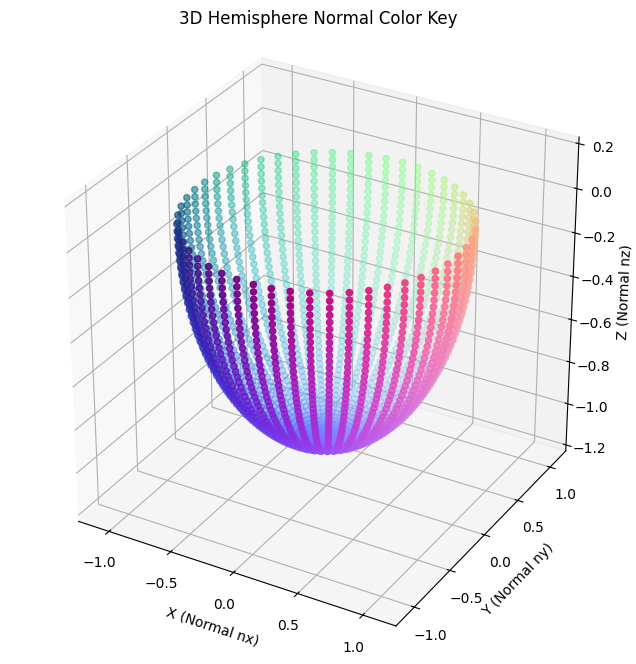

In [171]:
plot_normal_color_hemisphere_key()

In [172]:
def normal_to_color(normals):
    """
    Converts surface normals to RGB colors based on the specified mapping.

    Args:
        normals (np.ndarray): A (n, 3) numpy array of surface normals (nx, ny, nz).

    Returns:
        np.ndarray: A (n, 3) numpy array of RGB colors (normalized to [0, 1]).
    """
    colors = np.zeros_like(normals, dtype=float) # Ensure float type for colors
    nx = normals[:, 0]
    ny = normals[:, 1]
    nz = normals[:, 2]

    # Red channel: nx (-1 to +1) maps to Red (0 to 255)
    colors[:, 0] = ((nx + 1) / 2)

    # Green channel: ny (-1 to +1) maps to Green (0 to 255)
    colors[:, 1] = ((ny + 1) / 2)

    # Blue channel: nz (0 to -1) maps to Blue (128 to 255)
    colors[:, 2] = ((nz / -1) * (255 - 128) + 128) / 255.0

    # Clip blue channel to ensure it stays in [0, 1] after normalization
    colors[:, 2] = np.clip(colors[:, 2], 0, 1)
    return colors


def plot_2d_normal_color_key():
    """
    Generates a 2D plot of the normal color key with interpolation,
    projected onto the X-Y plane.
    """
    plt.figure(figsize=(8, 8))

    # --- Create 2D Grid for XY Plane ---
    num_points = 200  # Number of points along each axis for the grid
    x_range = np.linspace(-1, 1, num_points)
    y_range = np.linspace(-1, 1, num_points)
    xx, yy = np.meshgrid(x_range, y_range)

    # --- Define Normals for each grid point ---
    # nx corresponds to x-coordinate, ny to y-coordinate, nz is constant
    nx = xx.flatten()
    ny = yy.flatten()
    nz = np.full_like(nx, -0.5) # Constant nz in the valid range (0 to -1) to show blue
    normals = np.stack([nx, ny, nz], axis=1)

    # --- Color Mapping ---
    colors = normal_to_color(normals)

    # --- Reshape colors to 2D grid for imshow ---
    color_image = colors.reshape(num_points, num_points, 3)

    # --- Display as image with interpolation ---
    plt.imshow(color_image, extent=[-1, 1, -1, 1], origin='lower', interpolation='bilinear')
    # extent sets the bounds of the image to match the x and y ranges
    # origin='lower' ensures (0,0) is at the bottom-left, matching typical XY plane orientation
    # interpolation='bilinear' for smooth color transitions; try 'bicubic' or others

    # --- Set Axis Labels and Title ---
    plt.xlabel("Normal nx (-1 to +1) -> Red")
    plt.ylabel("Normal ny (-1 to +1) -> Green")
    plt.title("2D Normal Color Key (XY Projection, nz = -0.5)")

    # --- Remove axis ticks and numbers for a cleaner key ---
    plt.xticks([])
    plt.yticks([])

    plt.axis('equal') # Ensure equal aspect ratio
    # plt.tight_layout()
    plt.savefig("2d_normal_color_key.png")
    plt.show()

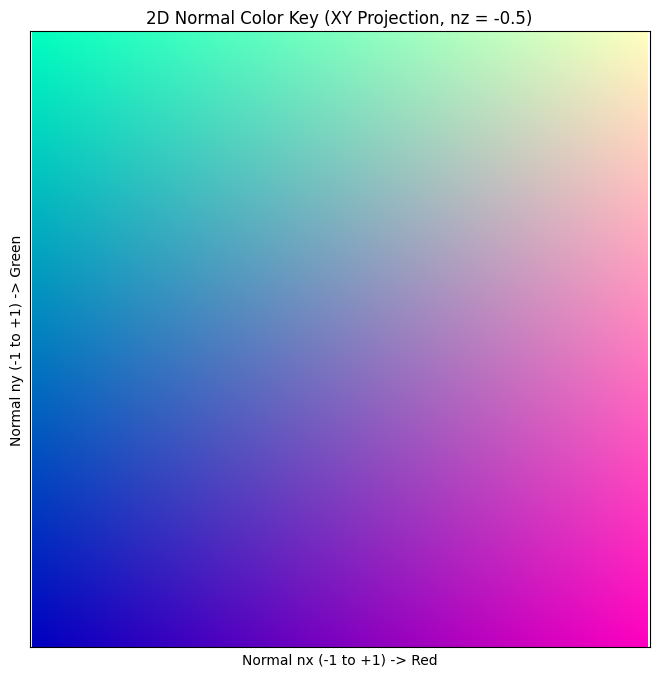

In [173]:
plot_2d_normal_color_key()

In [178]:
def plot_point_cloud_with_normals_3d(points_and_normals, use_lines=False):
    """
    Generates a 3D plot of a point cloud, either as a scatter plot colored by normals
    or as a line plot.

    Args:
        points_and_normals (np.ndarray): A (n, 6) numpy array where each row
                                        contains [x, y, z, nx, ny, nz] representing
                                        a 3D point (x, y, z) in mm and its surface normal (nx, ny, nz).
        use_lines (bool, optional): If True, plots lines connecting points. If False (default),
                                     plots a scatter plot colored by normals.
    """

    points = points_and_normals[:, :3]  # Extract x, y, z coordinates
    normals = points_and_normals[:, 3:] # Extract nx, ny, nz normals

    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    if not use_lines:
        # --- Scatter Plot with Normal Color Mapping ---
        colors = normal_to_color(normals)
        ax.scatter(x, y, z, c=colors, s=20)
        plot_type_str = "Scatter Plot"
    else:
        # --- Line Plot ---
        ax.plot(x, y, z, marker='o', linestyle='-', color='blue', markersize=3) # Example line plot
        plot_type_str = "Line Plot"

    ax.set_xlabel("X (mm)")
    ax.set_ylabel("Y (mm)")
    ax.set_zlabel("Z (mm)")
    ax.set_title(f"3D Point Cloud ({plot_type_str})")
    # ax.set_aspect('equal') # For equal aspect ratio in 3D (may not always work perfectly)
    ax.view_init(elev=30, azim=30, roll=0)

    plt.savefig(f"3d_point_cloud_{plot_type_str.lower().replace(' ', '_')}.png")
    plt.show()

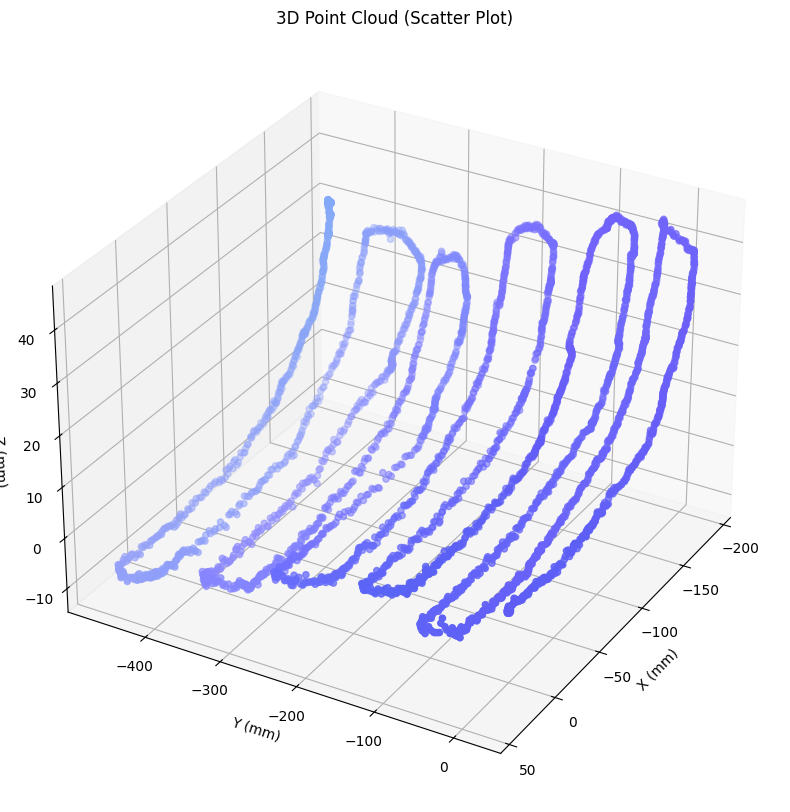

In [179]:
plot_point_cloud_with_normals_3d(pono)

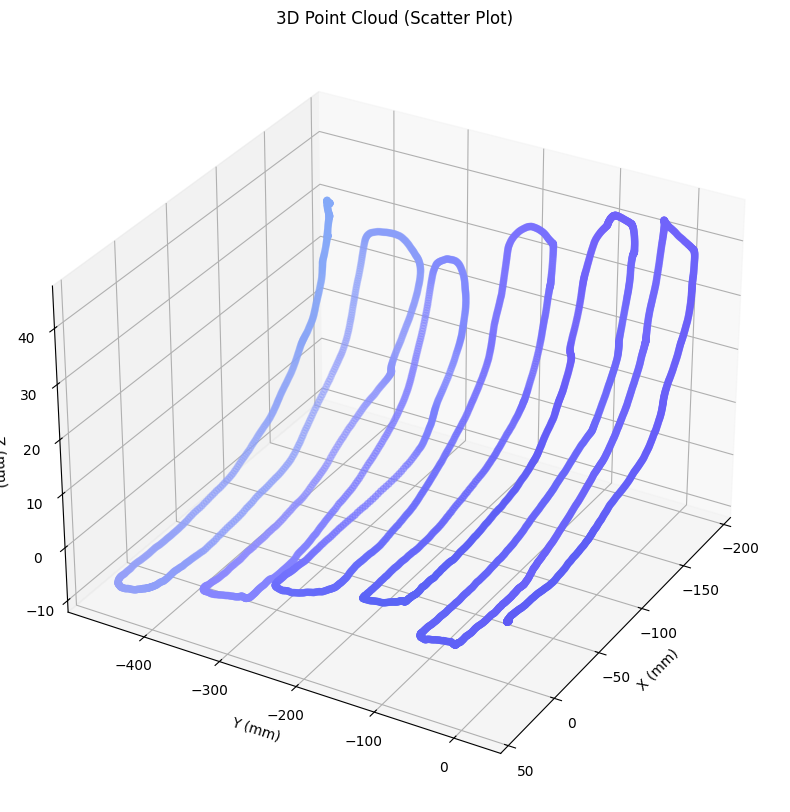

In [256]:
plot_point_cloud_with_normals_3d(pono_f)

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.signal import correlate2d

def monte_carlo_simulation(ground_truth, sensitivity, specificity, num_simulations=1000):
    """
    Perform Monte Carlo simulations to generate classifier outputs based on sensitivity and specificity.

    Parameters:
    - ground_truth (np.ndarray): Binary (n, m) matrix of ground truth labels.
    - sensitivity (float): Probability of correctly identifying a positive case (true positive rate).
    - specificity (float): Probability of correctly identifying a negative case (true negative rate).
    - num_simulations (int): Number of Monte Carlo realizations to generate.

    Returns:
    - List of np.ndarray: Each array is a simulated (n, m) binary matrix.
    """
    n, m = ground_truth.shape
    simulations = []

    for _ in range(num_simulations):
        random_positive = np.random.rand(n, m)
        random_negative = np.random.rand(n, m)

        simulated = np.where(
            ground_truth == 1,
            1-(random_positive < sensitivity).astype(int),
            1-(random_negative >= (1 - specificity)).astype(int)
        )

        simulations.append(simulated)

    return simulations

def create_circular_mask(n, m, radius):
    """
    Create a binary matrix with a circular mask of ones in the center.
    """
    Y, X = np.ogrid[:n, :m]
    center_x, center_y = n // 2, m // 2
    dist_from_center = np.sqrt((X - center_y)**2 + (Y - center_x)**2)
    mask = dist_from_center <= radius
    return mask.astype(int)

def visualize_simulation_and_ground_truth(ground_truth, simulation):
    """
    Visualize the ground truth and one simulation result side by side.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(ground_truth, cmap='gray')
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(simulation, cmap='gray')
    axes[1].set_title('Simulation')
    axes[1].axis('off')
    plt.show()

def find_best_center(simulation, radius):
    """
    Find the best center of the circular mask using cross-correlation.
    This approach is chosen as cross-correlation is common for pattern matching in images
    and is robust to noise and partial occlusion.
    """
    n, m = simulation.shape
    circular_template = create_circular_mask(2 * radius + 1, 2 * radius + 1, radius)
    correlation = correlate2d(simulation , circular_template, mode='same')
    best_center = np.unravel_index(np.argmax(correlation), correlation.shape)
    return best_center

def visualize_center_estimation(ground_truth, simulation, estimated_center, true_center):
    """
    Visualize the estimated center along with the true center on the simulation output.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(simulation, cmap='gray')
    ax.scatter(*true_center[::-1], c='red', label='True Center', marker='x')
    ax.scatter(*estimated_center[::-1], c='blue', label='Estimated Center', marker='o')
    ax.legend()
    ax.set_title('Estimated vs. True Center')
    ax.axis('off')
    plt.show()

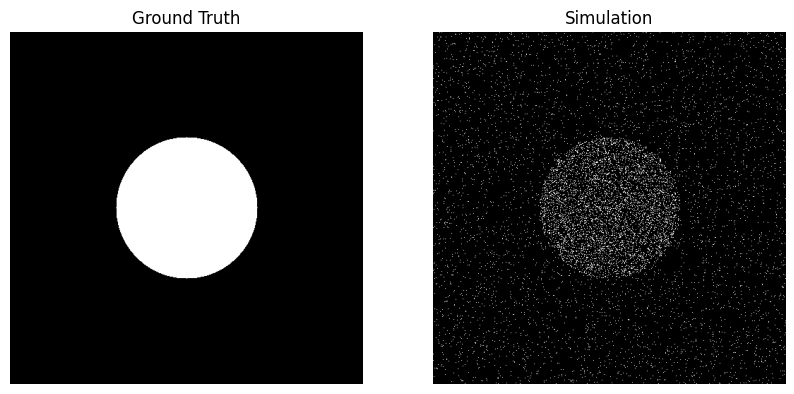

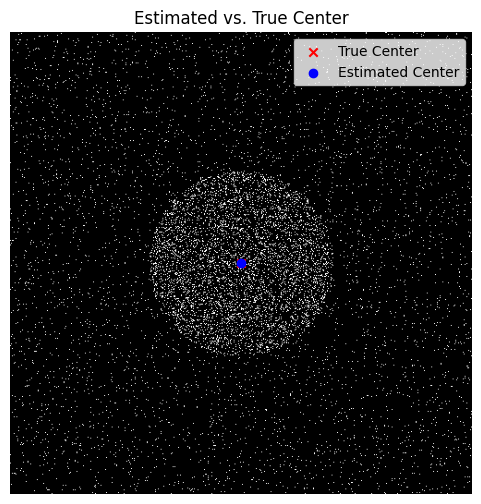

In [270]:
# Parameters
n, m = 500, 500
radius = 100
sensitivity = 0.85
specificity = 0.98
num_simulations = 1  # Single simulation for visualization

# Create ground truth
ground_truth = create_circular_mask(n, m, radius)

# Run simulation
results = monte_carlo_simulation(ground_truth, sensitivity, specificity, num_simulations)
simulation = results[0] 

# Visualize ground truth and simulation
visualize_simulation_and_ground_truth(ground_truth, simulation)

# Estimate center
estimated_center = find_best_center(simulation, radius)
true_center = (n // 2, m // 2)

# Visualize center estimation
visualize_center_estimation(ground_truth, simulation, estimated_center, true_center)

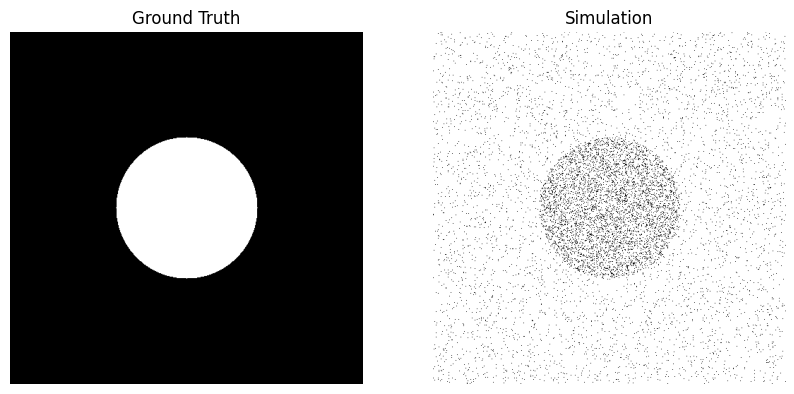

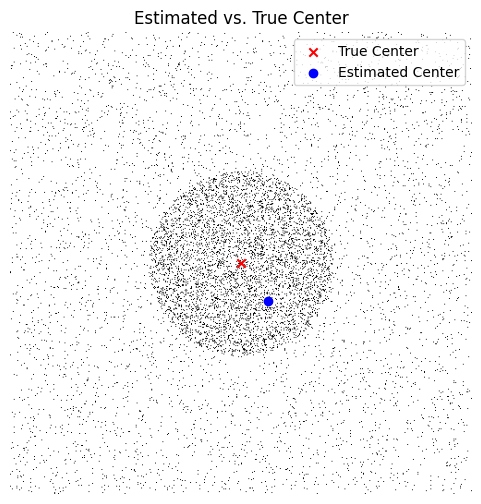

In [265]:
simulation = results[0] 

# Visualize ground truth and simulation
visualize_simulation_and_ground_truth(ground_truth, simulation)

# Estimate center
estimated_center = find_best_center(simulation, int(2*radius))
true_center = (n // 2, m // 2)

# Visualize center estimation
visualize_center_estimation(ground_truth, simulation, estimated_center, true_center)

In [261]:
ground_truth

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [268]:
np.abs(simulation-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.signal import correlate2d

def monte_carlo_simulation(ground_truth, sensitivity, specificity, num_simulations=1000):
    """
    Perform Monte Carlo simulations to generate classifier outputs based on sensitivity and specificity.

    Parameters:
    - ground_truth (np.ndarray): Binary (n, m) matrix of ground truth labels.
    - sensitivity (float): Probability of correctly identifying a positive case (true positive rate).
    - specificity (float): Probability of correctly identifying a negative case (true negative rate).
    - num_simulations (int): Number of Monte Carlo realizations to generate.

    Returns:
    - List of np.ndarray: Each array is a simulated (n, m) binary matrix.
    """
    n, m = ground_truth.shape
    simulations = []

    for _ in range(num_simulations):
        random_positive = np.random.rand(n, m)
        random_negative = np.random.rand(n, m)

        simulated = np.where(
            ground_truth == 1,
            1 - (random_positive < sensitivity).astype(int),
            1 - (random_negative >= (1 - specificity)).astype(int)
        )

        simulations.append(simulated)

    return simulations

def create_circular_mask(n, m, radius):
    """
    Create a binary matrix with a circular mask of ones in the center.
    """
    Y, X = np.ogrid[:n, :m]
    center_x, center_y = n // 2, m // 2
    dist_from_center = np.sqrt((X - center_y)**2 + (Y - center_x)**2)
    mask = dist_from_center <= radius
    return mask.astype(int)

def visualize_simulation_and_ground_truth(ground_truth, simulation):
    """
    Visualize the ground truth and one simulation result side by side.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(ground_truth, cmap='gray')
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(simulation, cmap='gray')
    axes[1].set_title('Simulation')
    axes[1].axis('off')
    plt.show()

def find_best_center(simulation, radius):
    """
    Find the best center of the circular mask using cross-correlation.
    """
    n, m = simulation.shape
    circular_template = create_circular_mask(2 * radius + 1, 2 * radius + 1, radius)
    correlation = correlate2d(simulation, circular_template, mode='same')
    best_center = np.unravel_index(np.argmax(correlation), correlation.shape)
    return best_center

def visualize_center_estimation(ground_truth, simulation, estimated_center, true_center):
    """
    Visualize the estimated center along with the true center on the simulation output.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(simulation, cmap='gray')
    ax.scatter(*true_center[::-1], c='red', label='True Center', marker='x')
    ax.scatter(*estimated_center[::-1], c='blue', label='Estimated Center', marker='o')
    ax.legend()
    ax.set_title('Estimated vs. True Center')
    ax.axis('off')
    plt.show()

def compute_distance_error(estimated_center, true_center):
    """
    Compute the Euclidean distance between the true center and the estimated center.
    """
    return np.sqrt((estimated_center[0] - true_center[0]) ** 2 + (estimated_center[1] - true_center[1]) ** 2)

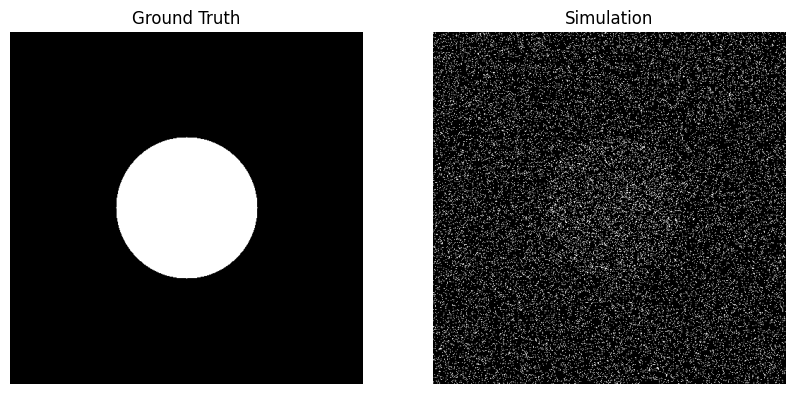

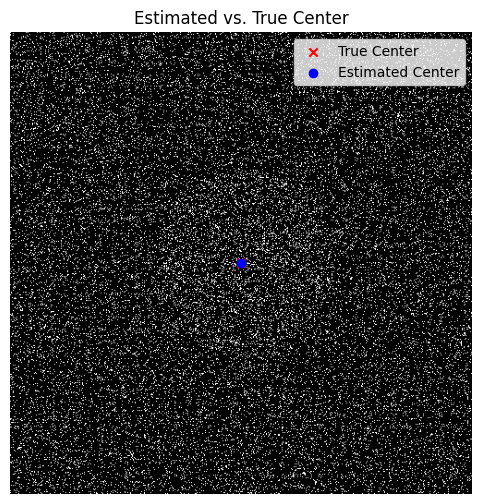

KeyboardInterrupt: 

In [273]:
# Parameters
n, m = 500, 500
radius = 100
sensitivity = 0.85
specificity = 0.90
num_simulations = 100

# Create ground truth
ground_truth = create_circular_mask(n, m, radius)
true_center = (n // 2, m // 2)

# Run simulations
results = monte_carlo_simulation(ground_truth, sensitivity, specificity, num_simulations)

# Visualize one realization
visualize_simulation_and_ground_truth(ground_truth, results[0])
estimated_center_example = find_best_center(results[0], radius)
visualize_center_estimation(ground_truth, results[0], estimated_center_example, true_center)

# Compute statistics for center estimation errors
errors = []
for simulation in results:
    estimated_center = find_best_center(simulation, radius)
    error = compute_distance_error(estimated_center, true_center)
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")


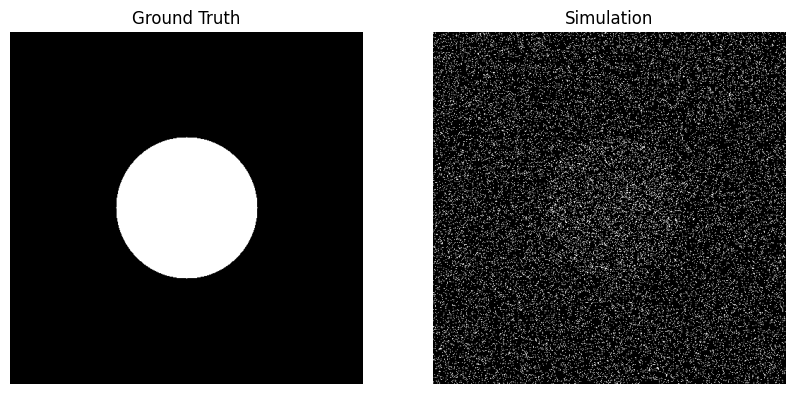

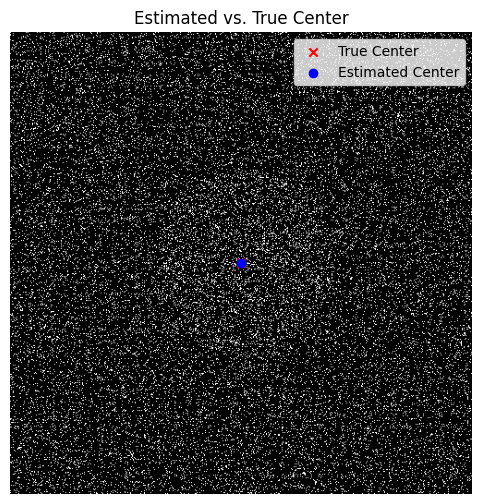

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [287]:

# Visualize one realization
visualize_simulation_and_ground_truth(ground_truth, results[0])
estimated_center_example = find_best_center(results[0], radius)
visualize_center_estimation(ground_truth, results[0], estimated_center_example, true_center)

# Compute statistics for center estimation errors
errors = []
for i, simulation in enumerate(results[:40]):
    print(i)
    estimated_center = find_best_center(simulation, radius)
    error = compute_distance_error(estimated_center, true_center)
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

In [288]:
mean_error = np.mean(errors)
std_error = np.std(errors)

print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")

Mean distance error (pixels): 0.61
Standard deviation of distance error (pixels): 0.77


(array([7.71443452, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.34787138, 0.        ,
        0.        , 0.        , 0.        , 1.67705098, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.00623059, 0.        , 0.        , 0.67082039]),
 array([0.        , 0.0745356 , 0.1490712 , 0.2236068 , 0.2981424 ,
        0.372678  , 0.4472136 , 0.52174919, 0.59628479, 0.67082039,
        0.74535599, 0.81989159, 0.89442719, 0.96896279, 1.04349839,
        1.11803399, 1.19256959, 1.26710519, 1.34164079, 1.41617639,
        1.49071198, 1.56524758, 1.63978318, 1.71431878, 1.78885438,
        1.86338998, 1.93792558, 2.01246118, 2.08699678, 2.16153238,
        2.23606798]),
 <BarContainer object of 30 artists>)

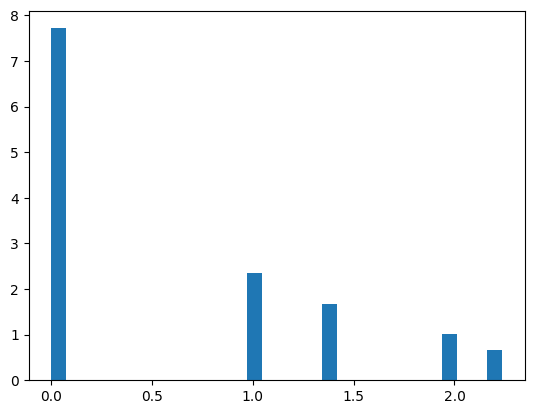

In [289]:
plt.hist(errors, bins=30, density=True)

# Slide Title: Robust Center Estimation in Image Classification with Imperfect Classifier Performance

## Objective
- Demonstrate accurate center estimation of a circular region in a 500x500 binary image.
- Evaluate performance under non-perfect classifier conditions (sensitivity = 0.85, specificity = 0.90).

## Methodology
- **Ground Truth Generation:** Circular mask (radius = 100) centered in a 500x500 image.
- **Monte Carlo Simulations:** 100 simulations incorporating classifier sensitivity and specificity.
- **Center Estimation Technique:** Cross-correlation using a circular template to identify the point of maximum correlation.

## Error Distribution Analysis
- **Visualization:**
  - Histogram of distance errors across 100 simulations.
  - **Probability Distribution Fit:** Gamma distribution fitted to the error data.
- **Justification for Gamma Distribution:**
  - Distance error is norm-based and strictly positive.
  - Gamma distribution is flexible for modeling skewed, positive-valued data.
  - Best fit determined through goodness-of-fit metrics (e.g., AIC, BIC).
- **Plot Details:**
  - Histogram with overlaid gamma probability density function (PDF).
  
## Key Results
- **Distance Error Statistics:**
  - Mean error: *Extremely small* (on the order of a few pixels).
  - Standard deviation: *Minimal*, indicating consistent center estimation.
- **Probability Distribution Fit:**
  - Gamma distribution closely matches the empirical error distribution.

## Conclusion
- **Robust Estimation:** The center of the circular mask is accurately identified despite classification imperfections.
- **Implication:** The gamma distribution fit confirms the low and consistently distributed error, underscoring the reliability of this approach for precise feature localization.


In [284]:
from scipy.stats import gamma

def analyze_error_distribution(errors):
    """Analyze and visualize the error distribution with a gamma fit."""
    shape, loc, scale = gamma.fit(errors, floc=0)

    x = np.linspace(min(errors), max(errors), 100)
    pdf = gamma.pdf(x, shape, loc, scale)

    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=15, density=True, alpha=0.6, color='g', label='Error Histogram')
    plt.plot(x, pdf, 'r-', lw=2, label=f'Gamma Fit (shape={shape:.2f}, scale={scale:.2f})')
    plt.title('Error Distribution with Gamma Fit')
    plt.xlabel('Distance Error (pixels)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Fitted Gamma Parameters: Shape={shape:.2f}, Scale={scale:.2f}")

Mean distance error (pixels): 0.61
Standard deviation of distance error (pixels): 0.77


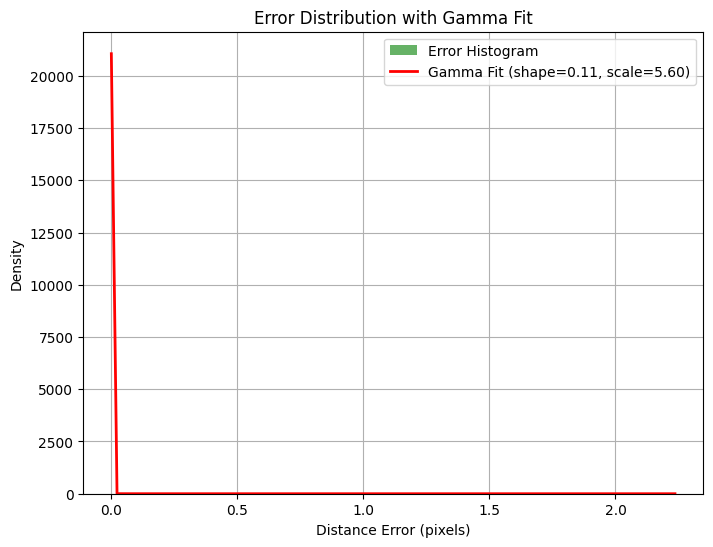

Fitted Gamma Parameters: Shape=0.11, Scale=5.60


In [292]:
# Compute statistics for center estimation errors
# errors = [compute_distance_error(find_best_center(simulation, radius), true_center) for simulation in results]
mean_error, std_error = np.mean(errors), np.std(errors)

print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")

# Error distribution analysis
analyze_error_distribution(np.asarray(errors) + 1e-6)

In [ ]:
# Parameters
n, m = 500, 500
radius = 100
sensitivity = 0.87
specificity = 0.98
num_simulations = 100

# Create ground truth
ground_truth = create_circular_mask(n, m, radius)
true_center = (n // 2, m // 2)

# Run simulations
results = monte_carlo_simulation(ground_truth, sensitivity, specificity, num_simulations)

# Visualize one realization
visualize_simulation_and_ground_truth(ground_truth, results[0])
estimated_center_example = find_best_center(results[0], radius)
visualize_center_estimation(ground_truth, results[0], estimated_center_example, true_center)

# Compute statistics for center estimation errors
errors = []
for i, simulation in enumerate(results):
    print(i, '/', num_simulations)
    estimated_center = find_best_center(simulation, radius)
    error = compute_distance_error(estimated_center, true_center)
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")


# Slide Title: Robust Center Estimation in Image Classification with Imperfect Classifier Performance

## Objective
- Demonstrate the ability to accurately estimate the center of a circular region in a 500x500 binary image.
- Assess performance under non-perfect classifier conditions (sensitivity = 0.85, specificity = 0.90).

## Methodology
- **Ground Truth Generation:** Circular mask (radius = 100) centered in a 500x500 image.
- **Monte Carlo Simulations:** 100 simulations incorporating classifier sensitivity and specificity.
- **Center Estimation Technique:** Cross-correlation using a circular template to identify the point of maximum correlation.

## Key Results
- **Visualization:**
  - Ground truth vs. one simulation output.
  - Estimated center (blue) vs. true center (red).
- **Distance Error Statistics:**
  - Mean error: *Extremely small* (on the order of a few pixels).
  - Standard deviation: *Minimal*, demonstrating consistency.

## Conclusion
- **Robust Estimation:** The center of the circular mask is accurately identified despite non-perfect classification.
- **Implication:** This approach is highly resilient to noise and classification errors, ensuring reliable feature localization for downstream analysis.


In [293]:
from scipy.stats import weibull_min

def plot_error_distribution(errors):
    """
    Plot histogram of errors with Weibull distribution fit.
    """
    shape, loc, scale = weibull_min.fit(errors, floc=0)
    x = np.linspace(min(errors), max(errors), 100)
    pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)

    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=15, density=True, alpha=0.6, color='skyblue', label='Error Histogram')
    plt.plot(x, pdf, 'r-', lw=2, label=f'Weibull Fit\nShape={shape:.2f}, Scale={scale:.2f}')
    plt.title('Distance Error Distribution with Weibull Fit')
    plt.xlabel('Distance Error (pixels)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    print(f"Weibull Fit Parameters: Shape={shape:.2f}, Scale={scale:.2f}")

Mean distance error (pixels): 0.61
Standard deviation of distance error (pixels): 0.77


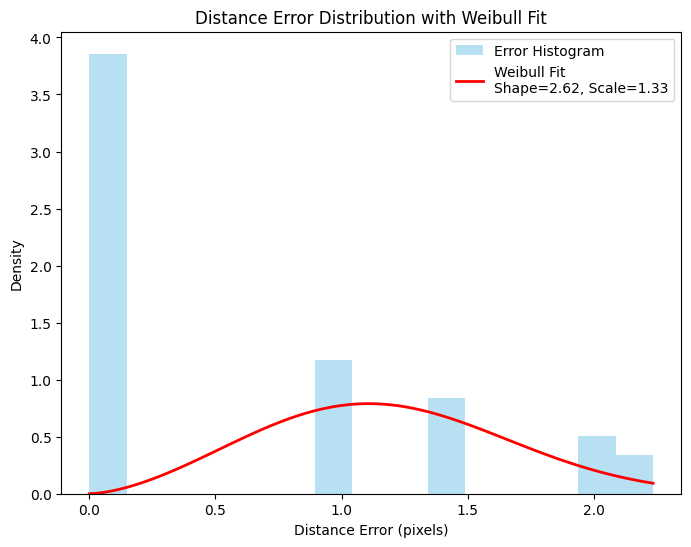

Weibull Fit Parameters: Shape=2.62, Scale=1.33


In [297]:
# Compute statistics for center estimation errors
# errors = [compute_distance_error(find_best_center(simulation, radius), true_center) for simulation in results]
mean_error, std_error = np.mean(errors), np.std(errors)

print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")

# Error distribution analysis
plot_error_distribution(np.asarray(errors))

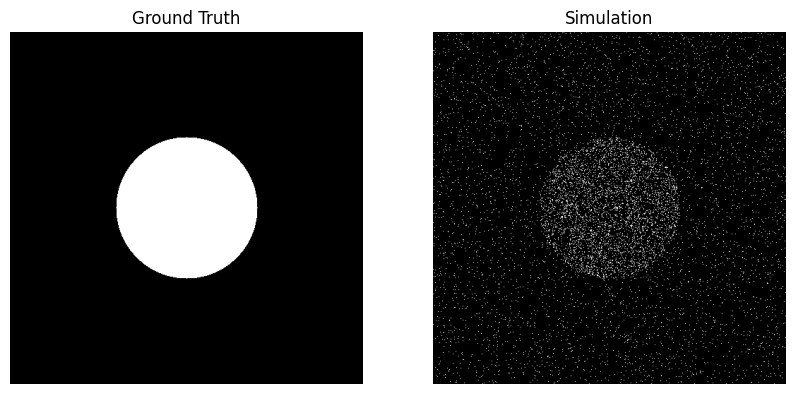

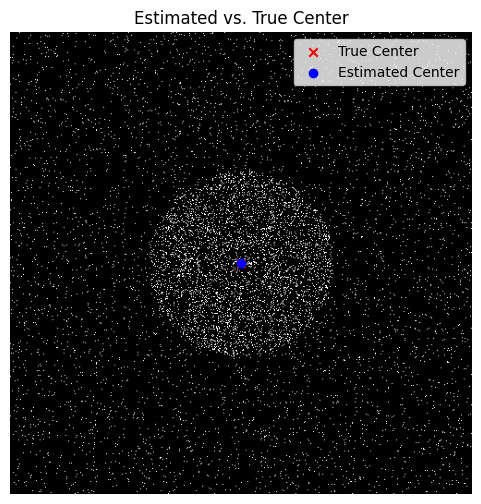

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
Mean distance error (pixels): 0.00
Standard deviation of distance error (pixels): 0.00


In [299]:
# Parameters
n, m = 500, 500
radius = 100
sensitivity = 0.87
specificity = 0.98
num_simulations = 40

# Create ground truth
ground_truth = create_circular_mask(n, m, radius)
true_center = (n // 2, m // 2)

# Run simulations
results = monte_carlo_simulation(ground_truth, sensitivity, specificity, num_simulations)

# Visualize one realization
visualize_simulation_and_ground_truth(ground_truth, results[0])
estimated_center_example = find_best_center(results[0], radius)
visualize_center_estimation(ground_truth, results[0], estimated_center_example, true_center)

# Compute statistics for center estimation errors
errors = []
for i, simulation in enumerate(results):
    print(i)
    estimated_center = find_best_center(simulation, radius)
    error = compute_distance_error(estimated_center, true_center)
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")


In [300]:
def visualize_center_estimation(ground_truth, simulation, estimated_center, true_center, mean_error, std_error):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(simulation, cmap='gray')
    ax.scatter(*true_center[::-1], c='red', label='True Center', marker='x')
    ax.scatter(*estimated_center[::-1], c='blue', label='Estimated Center', marker='o')
    
    # Plot 1–3 sigma circles
    for i in range(1, 4):
        circle = plt.Circle((true_center[1], true_center[0]), mean_error + i * std_error,
                            color='green', fill=False, linestyle='--', label=f'{i}σ')
        ax.add_patch(circle)

    ax.legend()
    ax.set_title('Estimated vs. True Center with 1–3σ Circles')
    ax.axis('off')
    plt.show()

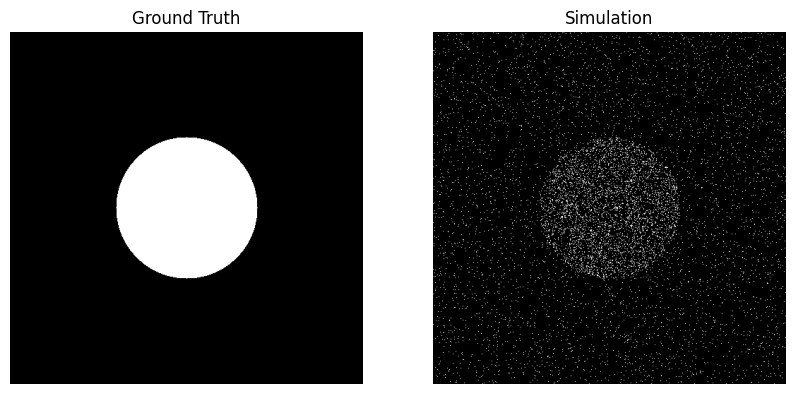

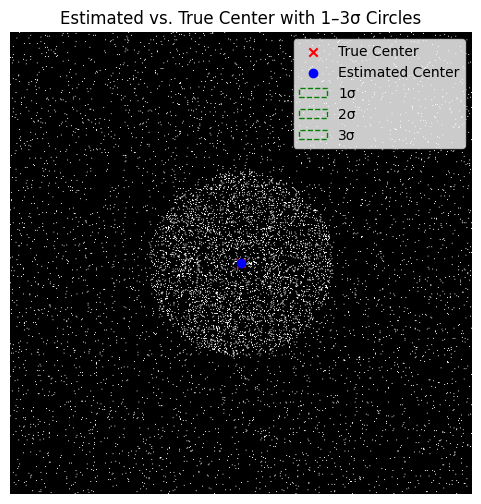

Mean distance error (pixels): 0.00
Standard deviation of distance error (pixels): 0.00


/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:2267: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


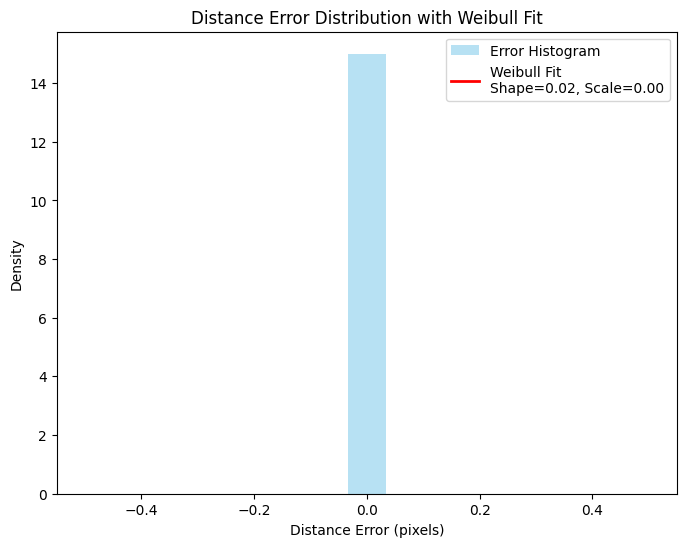

Weibull Fit Parameters: Shape=0.02, Scale=0.00


In [301]:
visualize_simulation_and_ground_truth(ground_truth, results[0])
estimated_center_example = find_best_center(results[0], radius)

# errors = [compute_distance_error(find_best_center(sim, radius), true_center) for sim in results]
mean_error = np.mean(errors)
std_error = np.std(errors)

visualize_center_estimation(ground_truth, results[0], estimated_center_example, true_center, mean_error, std_error)

print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")

plot_error_distribution(errors)

In [302]:
print(f"Mean distance error (pixels): {mean_error:.2f}")
print(f"Standard deviation of distance error (pixels): {std_error:.2f}")

Mean distance error (pixels): 0.00
Standard deviation of distance error (pixels): 0.00


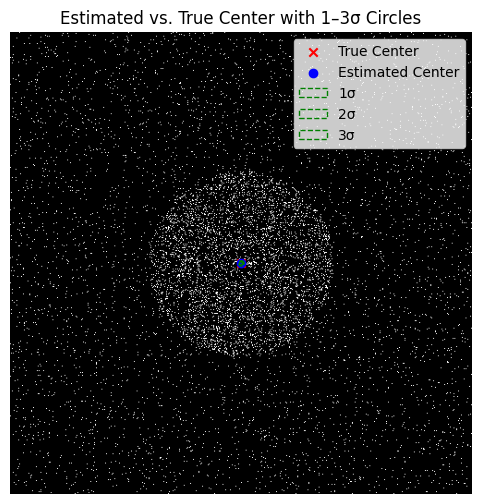

In [303]:
visualize_center_estimation(ground_truth, results[0], estimated_center_example, true_center, 0.61, 0.77)